*Luis Antonio Ortega Andrés    
Antonio Coín Castro*

In [31]:
from qiskit import QuantumCircuit, Aer, IBMQ, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex

import numpy as np
%matplotlib inline

# Load IBM account
provider = IBMQ.load_account()

/home/antcc/.local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2020-11-25 16:46:04,400: Credentials are already in use. The existing account in the session will be replaced.


# Algunas puertas cuánticas en Qiskit

## Puertas de 1 qubit

Probamos la puerta $X$ (*bit-flip*), la puerta $Y$ (*bit-and-phase flip*) y la puerta $Z$ (*phase flip*).

In [32]:
# Create 1-qubit circuits
qcX = QuantumCircuit(1)
qcY = QuantumCircuit(1)
qcZ = QuantumCircuit(1)

# Add gates connected to the only qubit q0
qcX.x(0)
qcY.y(0)
_ = qcZ.z(0)

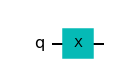

In [33]:
qcX.draw('mpl')

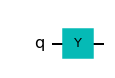

In [34]:
qcY.draw('mpl')

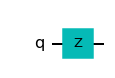

In [35]:
qcZ.draw('mpl')

Una vez construidos los circuitos, mostramos las matrices que intervienen. Sabemos que deberían ser:

$$X=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}, \quad Y=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}, \quad Z=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}$$

In [36]:
backend_unitary = Aer.get_backend('unitary_simulator')

jobX = execute(qcX, backend_unitary)
jobY = execute(qcY, backend_unitary)
jobZ = execute(qcZ, backend_unitary)
resultX = jobX.result()
resultY = jobY.result()
resultZ = jobZ.result()

In [37]:
print("X gate:\n", resultX.get_unitary(qcX, decimals=3))
print("Y gate:\n", resultY.get_unitary(qcY, decimals=3))
print("Z gate:\n", resultZ.get_unitary(qcZ, decimals=3))

X gate:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Y gate:
 [[0.-0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
Z gate:
 [[ 1.+0.j  0.+0.j]
 [-0.+0.j -1.+0.j]]


Por último, ejecutamos las simulaciones y mostramos los resultados, tomando como qubit inicial el valor por defecto $|0\rangle=(1, 0)^T$. Para ello, añadimos un registro clásico y una medida para hacer corresponder qubits a bits clásicos.

In [38]:
# Create measurement circuit with 1 qubit and 1 bit
meas = QuantumCircuit(1, 1)
meas.measure([0], [0])

qcX_meas = qcX + meas
qcY_meas = qcY + meas
qcZ_meas = qcZ + meas

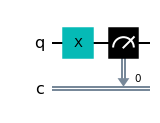

In [39]:
qcX_meas.draw('mpl')

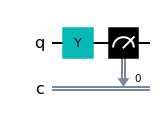

In [40]:
qcY_meas.draw('mpl')

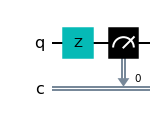

In [41]:
qcZ_meas.draw('mpl')

In [42]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuits on the simulator
job_sim_X = execute(qcX_meas, backend_sim, shots=1024)
job_sim_Y = execute(qcY_meas, backend_sim, shots=1024)
job_sim_Z = execute(qcZ_meas, backend_sim, shots=1024)

# Grab the results from the job and count measurements
result_sim_X = job_sim_X.result()
result_sim_Y = job_sim_Y.result()
result_sim_Z = job_sim_Z.result()
countsX = result_sim_X.get_counts(qcX_meas)
countsY = result_sim_Y.get_counts(qcY_meas)
countsZ = result_sim_Z.get_counts(qcZ_meas)

Para la puerta $X$ deberíamos obtener siempre la misma salida:

$$X|0\rangle=\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ 1\end{pmatrix}=|1\rangle.$$

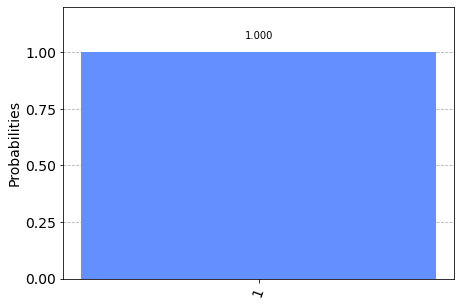

In [43]:
# Results for X gate
plot_histogram(countsX)

Para la puerta $Y$ tenemos:

$$Y|0\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}0\\ i\end{pmatrix}=i|1\rangle.$$

Es decir, obtendremos el qubit $|1\rangle$ con probabilidad $|i|^2=1.$

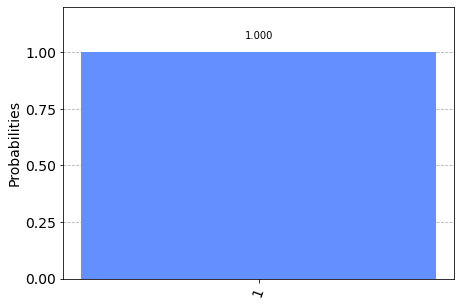

In [44]:
# Results for Y gate
plot_histogram(countsX)

Para la puerta $Z$ tenemos:

$$Z|0\rangle=\begin{pmatrix} 1 & 0\\ 0 & -1 \end{pmatrix}\begin{pmatrix} 1\\ 0\end{pmatrix} = \begin{pmatrix}1\\ 0\end{pmatrix}=|1\rangle.$$

Es decir, obtendremos el qubit $|1\rangle$ con probabilidad $|1|^2=1.$

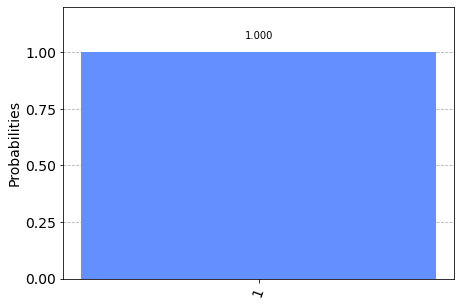

In [45]:
# Results for Z gate
plot_histogram(countsX)

## Puertas de 2 qubits

Probamos en este caso la puerta $C_X$, que introduce un qubit de control en la puerta $X$, que ahora solo se activa si el control es $|1\rangle$. También se conoce como puerta CNOT (Controlled NOT, $\oplus$). Consideramos que el qubit de control es $q_0$, el primero del circuito.

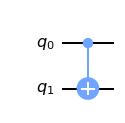

In [46]:
qc2 = QuantumCircuit(2)
qc2.cx(0, 1)
qc2.draw('mpl')

Sabemos que la matriz representación de la puerta $C_X$ en este caso es:

$$C_X=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}.$$

Esta representación de la matriz es la utilizada cuando se considera que el qubit más significativo es $q_0$ (es decir, cuando consideramos el estado conjunto $|q_0q_1\rangle$, que es lo habitual). Si, por el contrario, se considera que $q_0$ es el qubit menos significativo (entendiendo que los estados conjuntos son de la forma $|q_1q_0\rangle$), entonces la matriz a considerar es:

$$\tilde C_X=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\\ 0 & 1 & 0 & 0\end{pmatrix}.$$

En Qiskit, los circuitos se leen "de abajo hacia arriba", por lo que el primer qubit es el menos significativo, y por tanto la matriz considerada internamente es $\tilde C_X$. En concreto, **se permutan la segunda y la tercera fila y columna**, para hacer corresponder los únicos estados que cambian, $|01\rangle \leftrightsquigarrow |10\rangle$.

*Nota:* Si consideramos que el qubit de control es $q_1$, las dos matrices anteriores se intercambian.

In [47]:
job = execute(qc2, backend_unitary)
job.result().get_unitary(qc2, decimals=3)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

Pasamos ahora a hacer dos simulaciones, una con el qubit de control a $|0\rangle$ y otra con el qubit de control a $|1\rangle$, tomando en ambos casos $q_1=|0\rangle$. En el primer caso, se tiene que la puerta está "desactivada", y se comporta como la identidad:

$$C_X|00\rangle=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=|00\rangle.$$

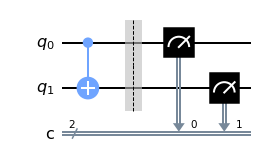

In [48]:
meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])
qc2.barrier()
qc2 += meas
qc2.draw('mpl')

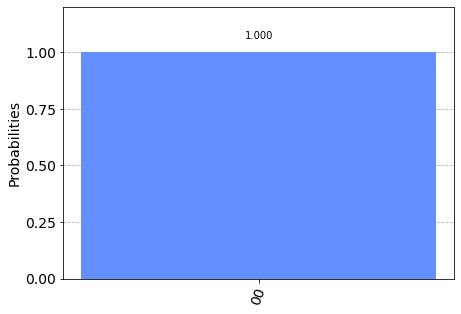

In [49]:
job_sim2 = execute(qc2, backend_sim, shots=1024)
result_sim2 = job_sim2.result()
counts2 = result_sim2.get_counts(qc2)
plot_histogram(counts2)

En el segundo caso, como la puerta está "activada", se comporta como la puerta $X$ en el segundo qubit:

$$C_X|10\rangle=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}\begin{pmatrix}0\\0\\1\\0\end{pmatrix}=\begin{pmatrix}0\\0\\0\\1\end{pmatrix}=|11\rangle.$$

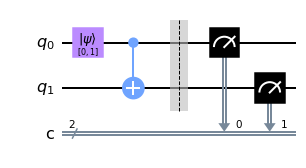

In [50]:
qc2bis = QuantumCircuit(2)
qc2bis.initialize([0, 1], 0)
qc2bis.cx(0, 1)
qc2bis.barrier()
qc2bis += meas
qc2bis.draw('mpl')

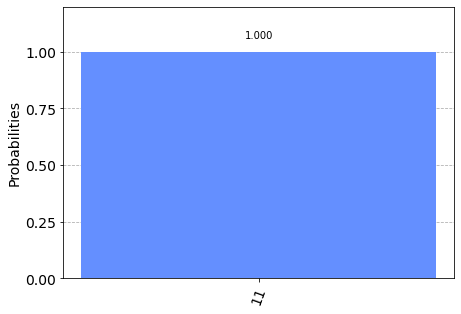

In [51]:
job_sim2bis = execute(qc2bis, backend_sim, shots=1024)
result_sim2bis = job_sim2bis.result()
counts2bis = result_sim2bis.get_counts(qc2bis)
plot_histogram(counts2bis)

De modo análogo pueden definirse las puertas $C_Y$ y $C_Z$. En general, si $U$ es una puerta dada por 
$$U=\begin{pmatrix}u_{00} & u_{01}\\ u_{10} & u_{11}\end{pmatrix},$$

entonces la puerta $C_U$ (donde el primer qubit es el de control) viene dada por:

$$C_U=\begin{pmatrix}1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & u_{00} & u_{01}\\ 0 & 0 & u_{10} & u_{11}\end{pmatrix}.$$

## Puertas en serie y en paralelo

Por último, veamos los circuitos más sencillos que podemos construir con dos puertas de un qubit (la generalización al caso de puertas con varios qubits es inmediata).

### Puertas en serie
En primer lugar consideramos el caso de puertas en serie. Por ejemplo, queremos combinar la salida de la puerta $X$ aplicada al qubit $|\psi\rangle=\frac{i}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$ con la puerta $Y$. Teóricamente, se tendría:

$$Y(X|\psi\rangle)= YX|\psi\rangle=\begin{pmatrix} 0 & -i\\ i & 0 \end{pmatrix}\begin{pmatrix} 0 & 1\\ 1 & 0 \end{pmatrix}\frac{1}{\sqrt{2}}\begin{pmatrix} i\\ 1\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} -i & 0\\ 0 & i \end{pmatrix}
\begin{pmatrix} i\\ 1\end{pmatrix}=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ i\end{pmatrix}=|\psi\rangle=\frac{1}{\sqrt{2}}|0\rangle + \frac{i}{\sqrt{2}}|1\rangle.$$

Es decir, deberíamos obtener como salida $|0\rangle$ y $|1\rangle$ con la misma probabilidad $\left|\frac{1}{\sqrt{2}}\right|^2=\left|\frac{i}{\sqrt{2}}\right|^2=\frac{1}{2}.$

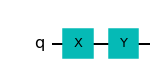

In [52]:
qc_orig = QuantumCircuit(1)
qc_orig.x(0)
qc_orig.y(0)
qc_orig.draw('mpl')

Podemos comprobar que, efectivamente, la matriz del circuito corresponde a la matriz $YX$ que hemos calculado arriba.

In [53]:
job = execute(qc_orig, backend_unitary)
print("Matriz unitaria del circuito:")
job.result().get_unitary(qc_orig, decimals=3)

Matriz unitaria del circuito:


array([[0.-1.j, 0.-0.j],
       [0.+0.j, 0.+1.j]])

Modificamos el circuito para que tenga en cuenta el estado inicial $|\psi\rangle$.

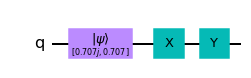

In [58]:
qc = QuantumCircuit(1)
qc.initialize([1.0j/np.sqrt(2), 1.0/np.sqrt(2)], 0)
qc.x(0)
qc.y(0)
qc.draw('mpl')

Podemos estudiar el vector de estados tras una simulación (antes de medir), y ver que efectivamente es $\frac{1}{\sqrt{2}}(1, i)^T$. Visualmente, se encuentra en el ecuador de la esfera de Bloch, lo que indica equiprobabilidad entre los estados $|0\rangle$ y $|1\rangle$.

<IPython.core.display.Math object>

None


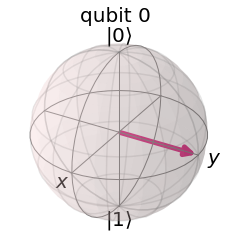

In [59]:
backend_state = Aer.get_backend('statevector_simulator')
psi = execute(qc, backend_state).result().get_statevector()
print(array_to_latex(psi, pretext="\\text{Statevector = }"))
plot_bloch_multivector(psi)

Si añadimos una medición al final de nuestro circuito y lo simulamos muchas veces, podemos comprobar como aproximadamente en la mitad de los casos colapsa al estado $|0\rangle$ y en la otra mitad al $|1\rangle$.

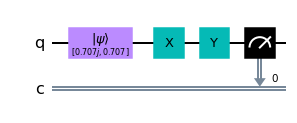

In [60]:
meas = QuantumCircuit(1, 1)
meas.measure([0], [0])
qc_meas = qc + meas
qc_meas.draw('mpl')

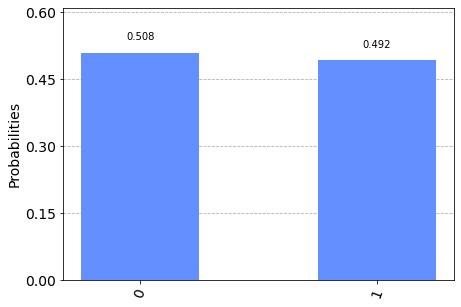

In [62]:
job_sim = execute(qc_meas, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_meas)
plot_histogram(counts)

### Puertas en paralelo

Finalmente analizamos el caso ligeramente más complejo de puertas en paralelo. Podemos hacer un análisis conjunto de las puertas, e incluso combinar sus matrices para conseguir una nueva matriz que poder aplicar al estado conjunto. Por ejemplo, si aplicamos la puerta $X$ al qubit $q_0$ y la puerta $Y$ al qubit $q_1$, el resultado conjunto de $X|q_0\rangle \otimes Y|q_1\rangle$ puede expresarse como el resultado de multiplicar la matriz $X \otimes Y$ por el vector conjunto $|q_0q_1\rangle$. Veámoslo para $q_0=q_1=0$. Por un lado,

$$X|0\rangle = |1\rangle, \quad Y|0\rangle = i|0\rangle$$
$$X|0\rangle \otimes Y|0\rangle=\begin{pmatrix}0\\1\end{pmatrix}\otimes \begin{pmatrix}i\\0\end{pmatrix}=\begin{pmatrix}0\\0\\0\\i\end{pmatrix}=i|11\rangle$$

Por otro lado:
$$X \otimes Y = \begin{pmatrix} 0 & Y\\Y & 0\end{pmatrix}=\begin{pmatrix} 0 & 0 & 0 & -i\\0 & 0 & i & 0\\ 0 & -i & 0 & 0\\i & 0 & 0 & 0\end{pmatrix}$$
$$(X\otimes Y)|00\rangle= \begin{pmatrix} 0 & 0 & 0 & -i\\0 & 0 & i & 0\\ 0 & -i & 0 & 0\\i & 0 & 0 & 0\end{pmatrix}\begin{pmatrix}1\\0\\0\\0\end{pmatrix}=\begin{pmatrix}0\\0\\0\\i\end{pmatrix}=i|11\rangle$$

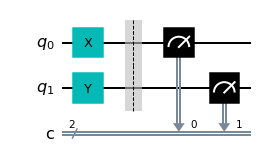

In [63]:
qc_par = QuantumCircuit(2)
qc_par.x(0)
qc_par.y(1)
qc_par.draw('mpl')
qc_par.barrier()
meas = QuantumCircuit(2, 2)
meas.measure([0, 1], [0, 1])
qc_meas_par = qc_par + meas
qc_meas_par.draw('mpl')

Podemos mostrar la matriz unitaria del circuito. Como en Qiskit el qubit $q_0$ es el menos significativo, la matriz cambia con respecto a la que mostramos antes, permutando la segunda y tercera fila y columna.

In [64]:
job = execute(qc_par, backend_unitary)
print("Matriz unitaria del circuito:")
job.result().get_unitary(qc_par, decimals=3)

Matriz unitaria del circuito:


array([[0.-0.j, 0.-0.j, 0.-0.j, 0.-1.j],
       [0.-0.j, 0.-0.j, 0.-1.j, 0.-0.j],
       [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j],
       [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j]])

Finalmente podemos ejecutar el circuito, aunque sabemos que obtendremos siempre el estado $|11\rangle$ (con probabilidad $|i|^2=1$).

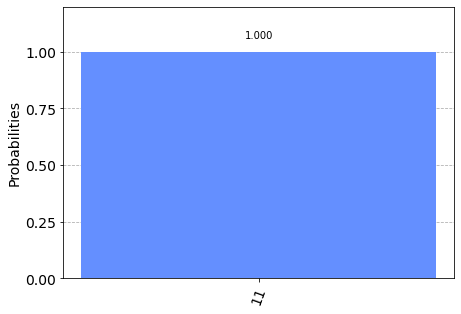

In [65]:
job_sim = execute(qc_meas_par, backend_sim)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_meas_par)
plot_histogram(counts)